In [1]:
'''
Name : Peter Sunny Shanthveer Markappa
Student Number: R00208303
Assignemnt : 01
Subject: Deep Learning
Submission Date: 03- April - 2022
'''

# two layer

'\nName : Peter Sunny Shanthveer Markappa\nStudent Number: R00208303\nAssignemnt : 01\nSubject: Deep Learning\nSubmission Date: 03- April - 2022\n'

In [ ]:
import tensorflow as tf
print(tf.__version__)

from keras.utils import np_utils
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import preprocessing
import tensorflow as tf
from numpy import exp
import numpy as np


2.8.0


In [ ]:
def softmax(vector):
    e = tf.exp(vector, name='exp')
    return e / tf.math.reduce_sum(e, keepdims=1, name=None, axis=0)

In [ ]:
def forward_pass(x, w1, b1, w2, b2, w3, b3):
    # We need to mutliply each training example by the weights and add bias
    y_pred = tf.matmul(x, tf.transpose(w1)) + b1

    relu_res = tf.keras.activations.relu(y_pred)
    # print("relu_res = ", relu_res.shape)

    y_pred1 = tf.matmul(relu_res, tf.transpose(w2)) + b2
    relu_res1 = tf.keras.activations.relu(y_pred1)
    # print("relu_res1 = ", relu_res1.shape)


    y_pred2 = tf.matmul(relu_res1,tf.transpose(w3)) + b3
    act = softmax(y_pred2)
    # act = tf.keras.activations.softmax(y_pred2)
    
    return act

In [ ]:
def calculate_accuracy(y_pred, tr_y):
    # Round the predictions by the logistical unit to either 1 or 0
    # predictions = tf.round(y_pred)

    # print("accuraty tr_y",tr_y.shape )
    # print("before y_pred",y_pred.shape )

    predictions_y_pred = tf.argmax(y_pred, axis=0)
    # print("predictions_y_pred", predictions_y_pred)
    
    predictions_tr_y = tf.argmax(tr_y, axis=0)
    # print("predictions_tr_y", predictions_tr_y)

    predictions_correct = tf.cast(tf.equal(tf.transpose(predictions_y_pred), predictions_tr_y), tf.dtypes.float64)
    
    # # Finally, we just determine the mean value of predictions_correct
    accuracy = tf.reduce_mean(predictions_correct)
    
    return accuracy

In [ ]:
def cross_entropy(tr_y, y_pred):
    # return (- 1 / tr_y.shape[0]) * tf.math.reduce_sum(tr_y * tf.math.log(y_pred) + (1 - tr_y) * (tf.math.log(1 - y_pred)))
    # print("tr_y Cross entropy", tr_y)
    # print("try_pred Cross entropy", y_pred)

    # print("Reduce Sum ", (tf.math.reduce_sum(tr_y * tf.math.log(y_pred) + (1 - tr_y) * (tf.math.log(1 - y_pred)))))
    # print("without Reduce Sum ", tr_y * tf.math.log(y_pred) + (1 - tr_y) * (tf.math.log(1 - y_pred)))

    return (-1/tr_y.shape[0]) * (tf.math.reduce_sum(tr_y * tf.math.log(y_pred) + (1 - tr_y) * (tf.math.log(1 - y_pred))))


In [ ]:
def main():
    
    fashion_mnist = tf.keras.datasets.fashion_mnist

    # load the training and test data    
    (tr_x, tr_y), (te_x, te_y) = fashion_mnist.load_data()

    # reshape the feature data
    tr_x = tr_x.reshape(tr_x.shape[0], 784)
    te_x = te_x.reshape(te_x.shape[0], 784)

    # noramlise feature data
    tr_x = tr_x / 255.0
    te_x = te_x / 255.0


    # one hot encode the training labels and get the transpose
    tr_y = np_utils.to_categorical(tr_y, 10)
    tr_y = tr_y.T
#     print ("Shape of training labels after transpose ", tr_y.shape)

    # one hot encode the test labels and get the transpose
    te_y = np_utils.to_categorical(te_y, 10)
    te_y = te_y.T
#     print ("Shape of testing labels after transpose ", te_y.shape)
    
    
      # array is used to store change in cost function for each iteration of GD
    trainingLoss= []
    validationLoss= []
    trainingAccuracies = []
    validationAccuracies = []


    
    learning_rate = 0.01
    num_Iterations = 500
    
    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)    
#     cross_entropy = tf.keras.losses.categorical_crossentropy()
    
    
    #  X_digits, y_digits = loadData()    
    tr_x = tf.convert_to_tensor(tr_x, tf.dtypes.float64)
    te_x = tf.convert_to_tensor(te_x, tf.dtypes.float64)
    tr_y = tf.convert_to_tensor(tr_y, tf.dtypes.float64)
    te_y = tf.convert_to_tensor(te_y, tf.dtypes.float64)
    
    # We need a coefficient for each of the features and a single bias value
    # Notice we create a column vector of weights all initialized to small random values

    w1 = tf.Variable(tf.random.normal( [300, 784] , mean=0.0, stddev=0.05,dtype=tf.dtypes.float64))
    b1 = tf.Variable(tf.random.normal([300], dtype=tf.dtypes.float64))   

    w2 = tf.Variable(tf.random.normal([100, 300] , mean=0.1, stddev=0.08,dtype=tf.dtypes.float64))
    b2 = tf.Variable(tf.random.normal([100], dtype=tf.dtypes.float64))

    w3 = tf.Variable(tf.random.normal([10, 100] , mean=0.2, stddev=0.03,dtype=tf.dtypes.float64))
    b3 = tf.Variable(tf.random.normal([10], dtype=tf.dtypes.float64))



    
    # Splitting the Training data into two parts
    # 1) traning 2) Validation

    tr_x_Training = tr_x[ : 48000, :]
    tr_x_Validation = tr_x[ 48000:, :]

    tr_y_Training = tr_y[ : , : 48000]
    tr_y_Validation = tr_y[ : , 48000 :]


    # Iterate our training loop
    for i in range(1000):
        
        # Create an instance of GradientTape to monitor the forward pass
        # and calcualte the gradients for each of the variables m and c
        
        with tf.GradientTape() as tape:

            # Training
            y_pred_training = forward_pass(tr_x_Training, w1, b1, w2, b2, w3, b3)

            # print("before cross entropy tr_y_Training",tr_y_Training.shape )
            # print("before cross entropy y_pred_training",y_pred_training.shape )

            training_Loss = cross_entropy(tf.transpose(tr_y_Training), y_pred_training)
            trainingLoss.append(training_Loss)
        
        gradients = tape.gradient(training_Loss, [w1, b1, w2, b2, w3, b3])

        training_accuracy = calculate_accuracy(tf.transpose(y_pred_training), tr_y_Training)
        trainingAccuracies.append(training_accuracy)
        
        adam_optimizer.apply_gradients(zip(gradients, [w1, b1, w2, b2, w3, b3]))
        

        # # Validation
        y_pred_validation = forward_pass(tr_x_Validation, w1, b1, w2, b2, w3, b3)
        validation_Loss = cross_entropy(tf.transpose(tr_y_Validation), y_pred_validation)
        validation_accuracy = calculate_accuracy(tf.transpose(y_pred_validation), tr_y_Validation)
        validationLoss.append(validation_Loss)    
        validationAccuracies.append(validation_accuracy)

        if i % 50 == 0:
          print ("Iteration ", i, "\n")
          print(": Training Loss = ",training_Loss.numpy(), ": Validation Loss = ",validation_Loss.numpy())
          print( "Training Accuracies: ", training_accuracy.numpy(), "Validation Accuracies: ", validation_accuracy.numpy())
          print ("----------------")



    # Test Data
    y_pred = forward_pass(te_x, w1, b1, w2, b2, w3, b3)
    currentLoss = cross_entropy(tf.transpose(te_y), y_pred)
    test_accuracy = calculate_accuracy(tf.transpose(y_pred), te_y) 
    print ("Test Accuracy : ", test_accuracy)


    plt.plot(trainingLoss, label="Train Loss")        
    plt.plot(validationLoss, label="Val Loss")
    plt.legend()
    plt.show()

    plt.plot(trainingAccuracies, label="Train Acc")
    plt.plot(validationAccuracies, label="Val Acc")
    plt.legend()
    plt.show()



Iteration  0 

: Training Loss =  81.05325442648116 : Validation Loss =  38.21305687938821
Training Accuracies:  0.14795833333333333 Validation Accuracies:  0.12116666666666667
----------------
Iteration  50 

: Training Loss =  13.174365344300208 : Validation Loss =  12.771765516101032
Training Accuracies:  0.4150625 Validation Accuracies:  0.30183333333333334
----------------
Iteration  100 

: Training Loss =  11.049611417256544 : Validation Loss =  10.094108696816331
Training Accuracies:  0.604875 Validation Accuracies:  0.6210833333333333
----------------
Iteration  150 

: Training Loss =  10.320342805412675 : Validation Loss =  9.068015489961974
Training Accuracies:  0.6465625 Validation Accuracies:  0.65525
----------------
Iteration  200 

: Training Loss =  9.90112901604607 : Validation Loss =  8.571870077601417
Training Accuracies:  0.6804375 Validation Accuracies:  0.68525
----------------
Iteration  250 

: Training Loss =  9.665120817959782 : Validation Loss =  8.31177583

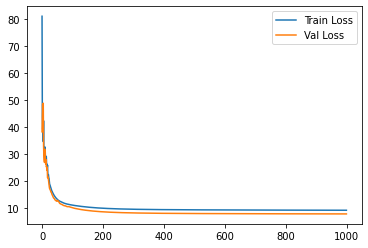

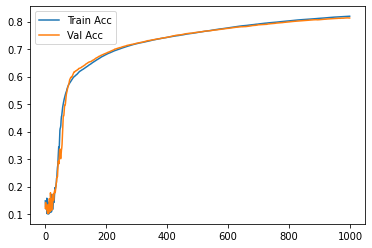

In [ ]:
main()